<a href="https://colab.research.google.com/github/siddharthapramanik771/CNN-based-classification-architecture-for-classifying-images/blob/main/CNN_based_classification_architecture_for_classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np
import pandas as pd
from PIL import Image
from numpy import asarray
import random
from matplotlib import pyplot as plt
import seaborn as sns
import random
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
#from keras.datasets import mnist

In [2]:
path = '/content/drive/MyDrive/Data_for_ML/charts'

In [3]:
def get_image_data(path):
  img = Image.open(path)
  img = img.convert('LA')
  data = asarray(img)
  return data/255

In [4]:
source = pd.read_csv(path+'/train_val.csv')

In [5]:
source = source.to_dict('records')

In [6]:
type_list = []
for i in source:
  # if i['image_index']%100 == 0: print(i['image_index'])
  i['image_data'] = get_image_data(path+'/train_val/'+str(i['image_index'])+'.png')
  if i['type'] in type_list:
    i['type'] = type_list.index(i['type'])
  else:
    print(i['type'])
    type_list.append(i['type'])
    i['type'] = len(type_list)-1  

vbar_categorical
hbar_categorical
line
pie
dot_line


In [7]:
random.shuffle(source)

In [ ]:
type_list

['vbar_categorical', 'hbar_categorical', 'line', 'pie', 'dot_line']

In [8]:
source

[{'image_index': 339,
  'type': 1,
  'image_data': array([[[1.        , 0.81176471],
          [1.        , 0.86666667],
          [1.        , 0.86666667],
          ...,
          [1.        , 0.86666667],
          [1.        , 0.86666667],
          [1.        , 0.86666667]],
  
         [[1.        , 0.94901961],
          [1.        , 1.        ],
          [1.        , 1.        ],
          ...,
          [1.        , 1.        ],
          [1.        , 1.        ],
          [1.        , 1.        ]],
  
         [[1.        , 0.9372549 ],
          [1.        , 1.        ],
          [1.        , 1.        ],
          ...,
          [1.        , 1.        ],
          [1.        , 1.        ],
          [1.        , 1.        ]],
  
         ...,
  
         [[1.        , 0.9372549 ],
          [1.        , 1.        ],
          [1.        , 1.        ],
          ...,
          [1.        , 1.        ],
          [1.        , 1.        ],
          [1.        , 1.        ]

In [ ]:
data = pd.DataFrame(source)

In [9]:
X = np.array([i['image_data'] for i in source])
Y = np.array([i['type'] for i in source])
# Y = to_categorical(Y)

In [10]:
X_train = X[:800]
X_val = X[800:]
Y_train = Y[:800]
Y_val = Y[800:]

In [11]:
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,2)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = cnn_model.fit(X_train, Y_train, batch_size=500, epochs=100,validation_data=(X_val, Y_val),callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 17s 2s/step - loss: 2.0668 - accuracy: 0.2013 - val_loss: 1.7212 - val_accuracy: 0.2050
Epoch 2/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6618 - accuracy: 0.2025 - val_loss: 1.6083 - val_accuracy: 0.2200
Epoch 3/100
2/2 [==============================] - 0s 123ms/step - loss: 1.5983 - accuracy: 0.2688 - val_loss: 1.5952 - val_accuracy: 0.1800
Epoch 4/100
2/2 [==============================] - 0s 122ms/step - loss: 1.5757 - accuracy: 0.2062 - val_loss: 1.5418 - val_accuracy: 0.3600
Epoch 5/100
2/2 [==============================] - 0s 121ms/step - loss: 1.5186 - accuracy: 0.3963 - val_loss: 1.4544 - val_accuracy: 0.5400
Epoch 6/100
2/2 [==============================] - 0s 132ms/step - loss: 1.4205 - accuracy: 0.5638 - val_loss: 1.3415 - val_accuracy: 0.6750
Epoch 7/100
2/2 [==============================] - 0s 119ms/step - loss: 1.2920 - accuracy: 0.7312 - val_loss: 1.1734 - val_accuracy: 0.7050
Epoch 8/100
2/2

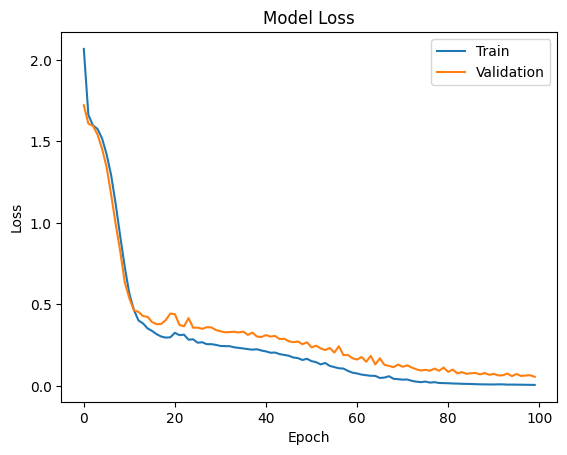

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

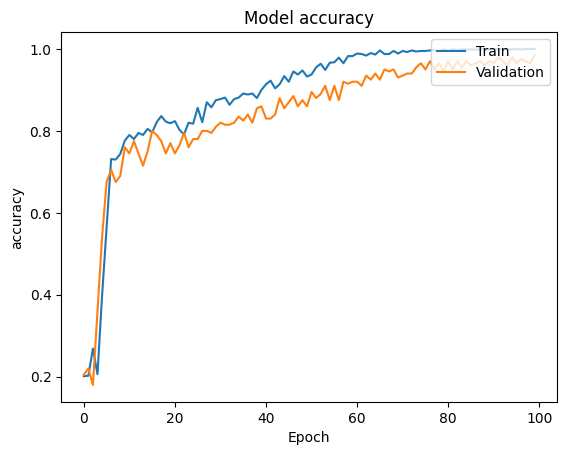

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [15]:
 cnn_model.evaluate(X_val,Y_val)

7/7 [==============================] - 0s 22ms/step - loss: 0.0557 - accuracy: 0.9850


[0.05568647012114525, 0.9850000143051147]

In [16]:
X_test = {(path+'/test/'+i):get_image_data(path+'/test/'+i) for i in os.listdir(path+'/test')}

In [ ]:
X_test

In [17]:
def get_prediction(x):
  y = cnn_model.predict(np.array([x]))
  y = [np.argmax(element) for element in y]
  return type_list[y[0]]

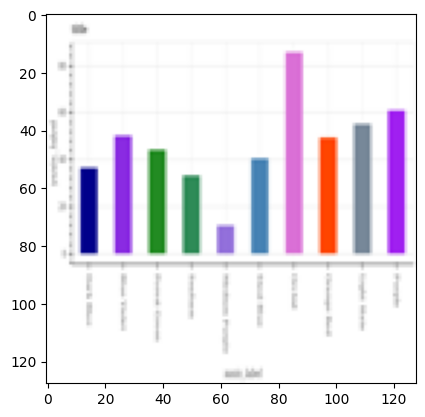

1/1 [==============================] - 0s 187ms/step
vbar_categorical


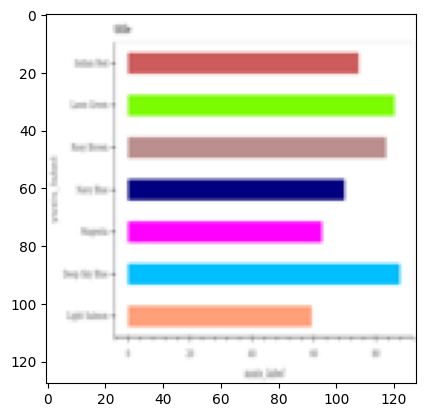

1/1 [==============================] - 0s 22ms/step
hbar_categorical


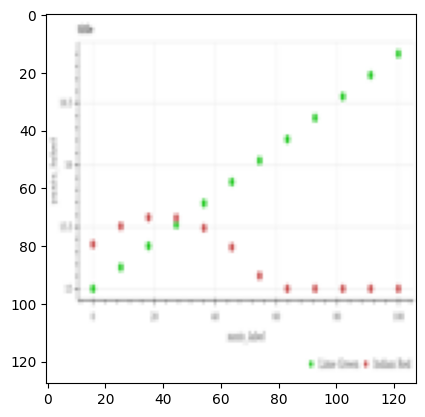

1/1 [==============================] - 0s 19ms/step
dot_line


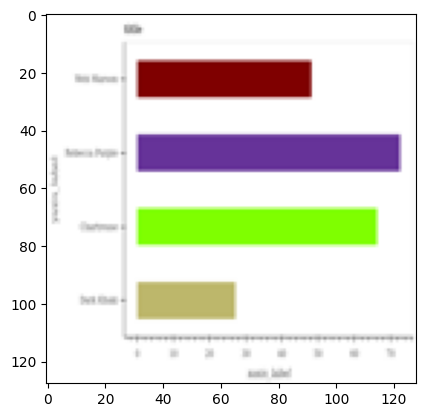

1/1 [==============================] - 0s 25ms/step
hbar_categorical


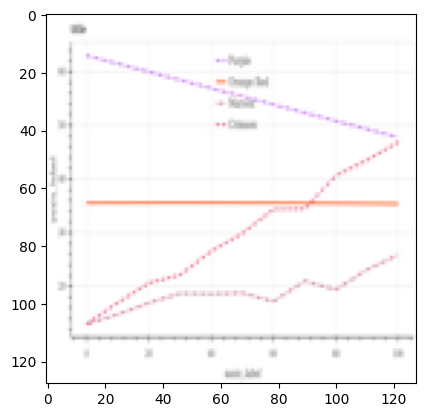

1/1 [==============================] - 0s 21ms/step
line


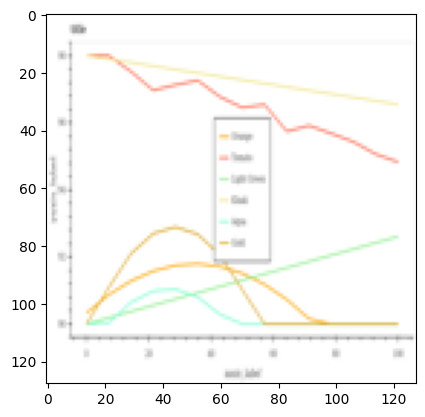

1/1 [==============================] - 0s 19ms/step
line


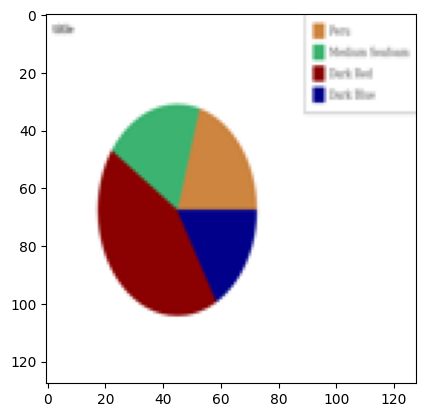

1/1 [==============================] - 0s 18ms/step
pie


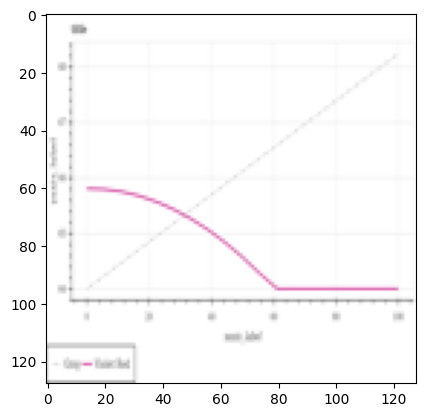

1/1 [==============================] - 0s 49ms/step
dot_line


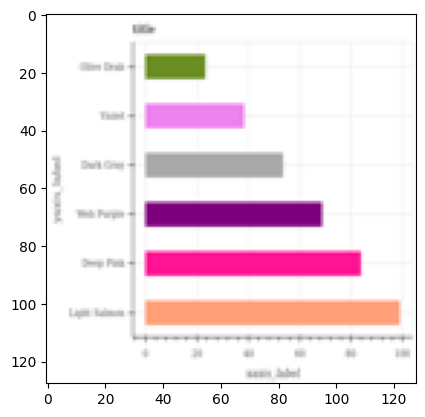

1/1 [==============================] - 0s 75ms/step
hbar_categorical


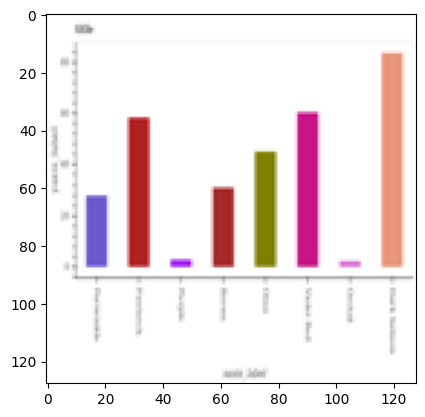

1/1 [==============================] - 0s 23ms/step
vbar_categorical


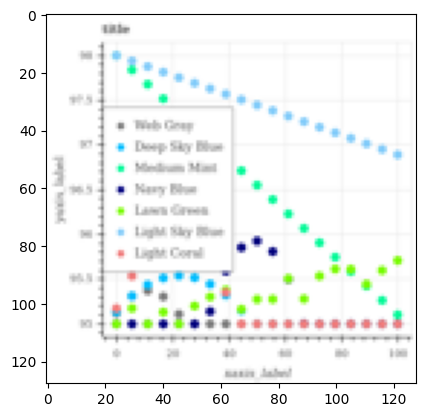

1/1 [==============================] - 0s 20ms/step
dot_line


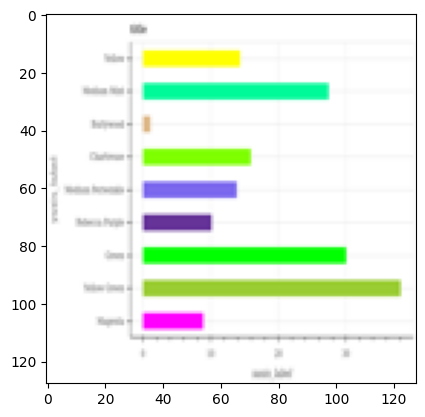

1/1 [==============================] - 0s 20ms/step
hbar_categorical


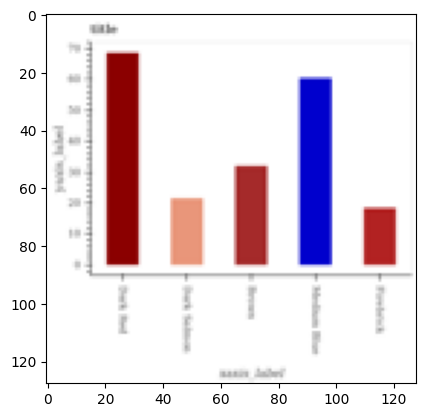

1/1 [==============================] - 0s 20ms/step
vbar_categorical


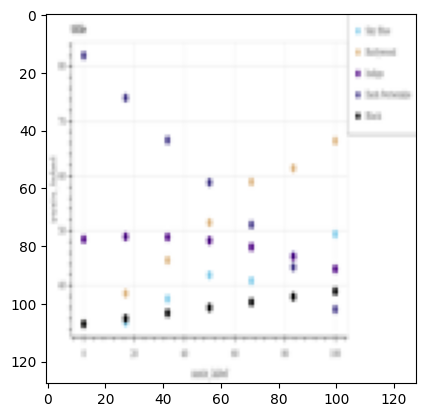

1/1 [==============================] - 0s 26ms/step
dot_line


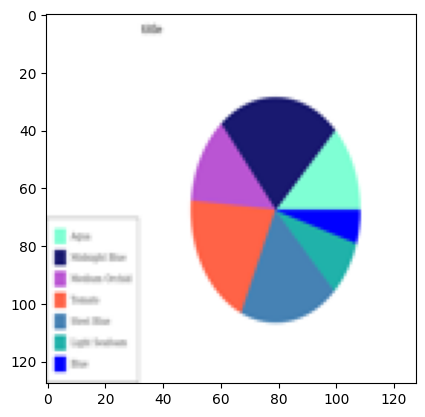

1/1 [==============================] - 0s 25ms/step
pie


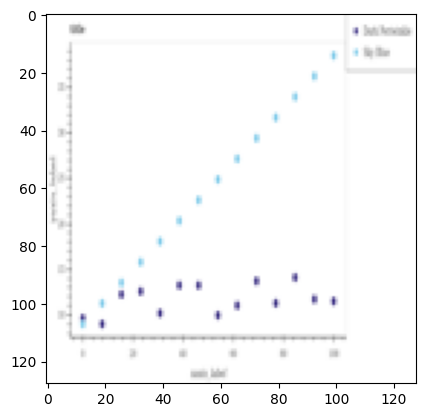

1/1 [==============================] - 0s 21ms/step
dot_line


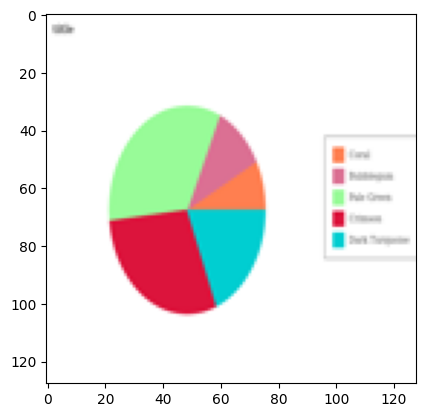

1/1 [==============================] - 0s 22ms/step
pie


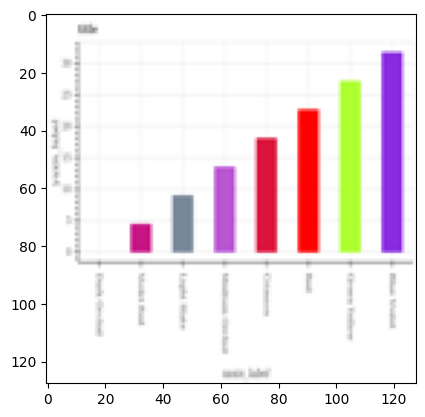

1/1 [==============================] - 0s 20ms/step
vbar_categorical


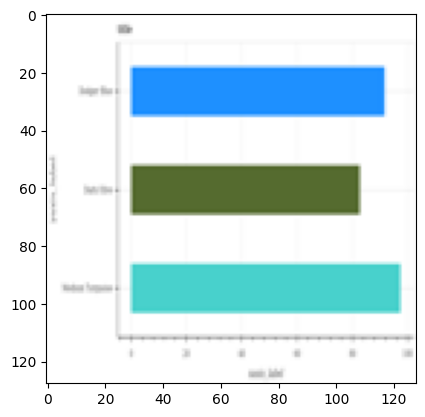

1/1 [==============================] - 0s 21ms/step
hbar_categorical


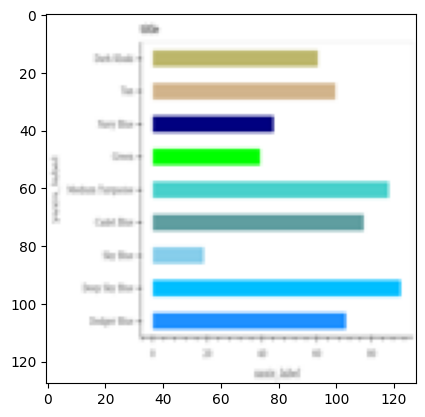

1/1 [==============================] - 0s 18ms/step
hbar_categorical


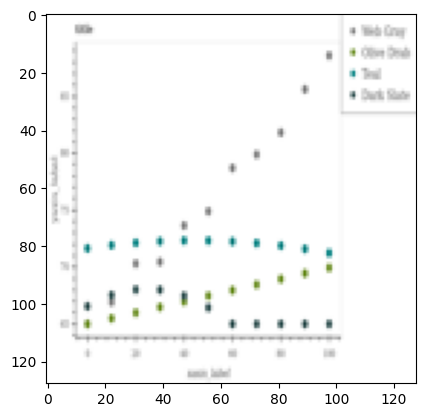

1/1 [==============================] - 0s 19ms/step
dot_line


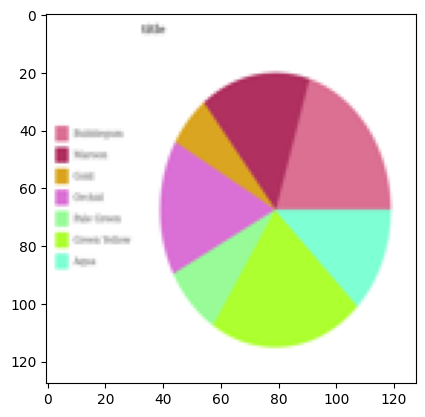

1/1 [==============================] - 0s 19ms/step
pie


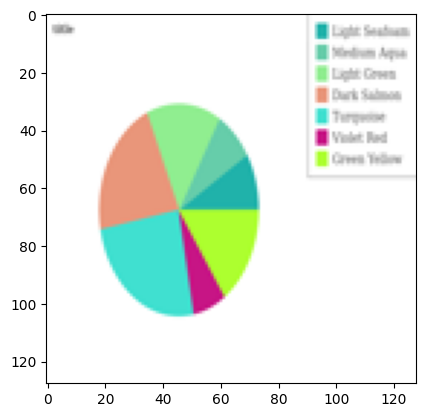

1/1 [==============================] - 0s 22ms/step
pie


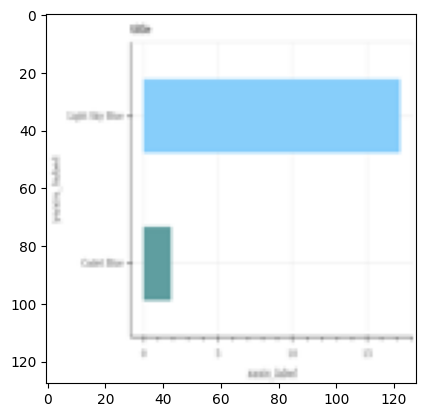

1/1 [==============================] - 0s 19ms/step
hbar_categorical


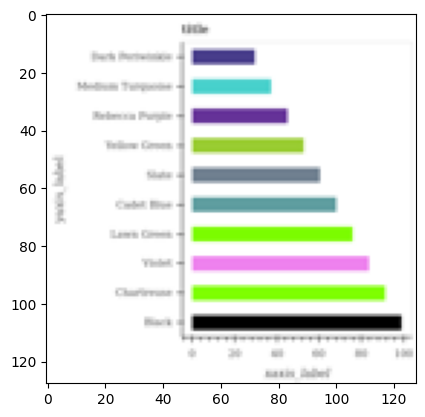

1/1 [==============================] - 0s 24ms/step
hbar_categorical


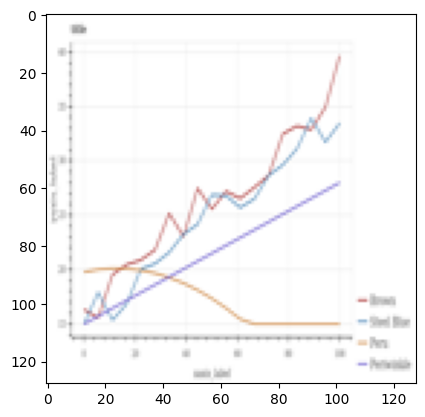

1/1 [==============================] - 0s 22ms/step
line


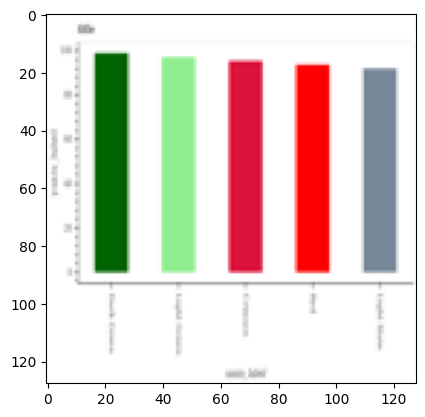

1/1 [==============================] - 0s 18ms/step
vbar_categorical


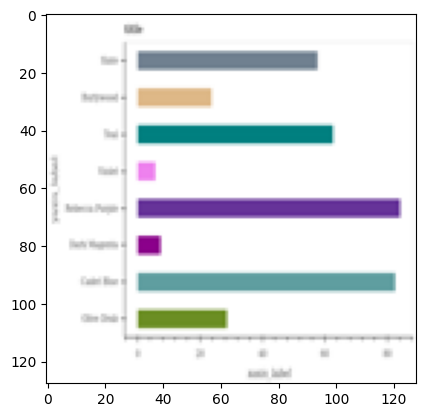

1/1 [==============================] - 0s 21ms/step
hbar_categorical


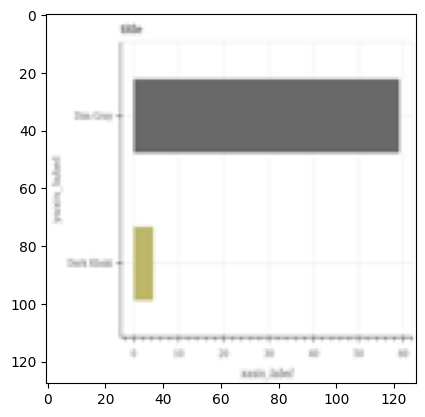

1/1 [==============================] - 0s 21ms/step
hbar_categorical


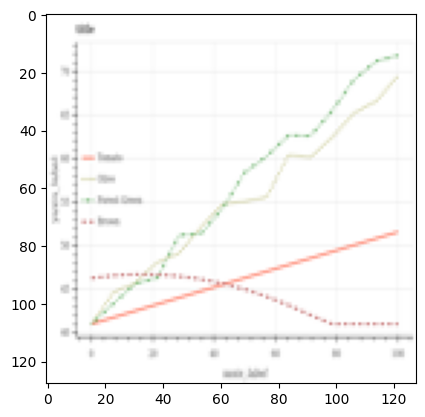

1/1 [==============================] - 0s 18ms/step
line


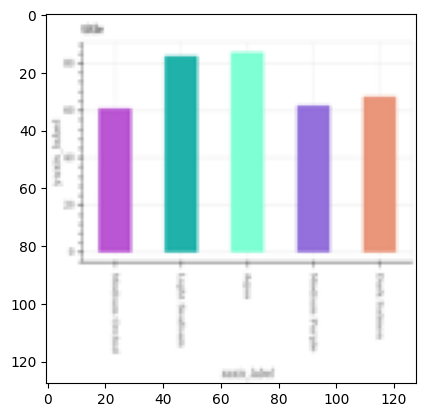

1/1 [==============================] - 0s 28ms/step
vbar_categorical


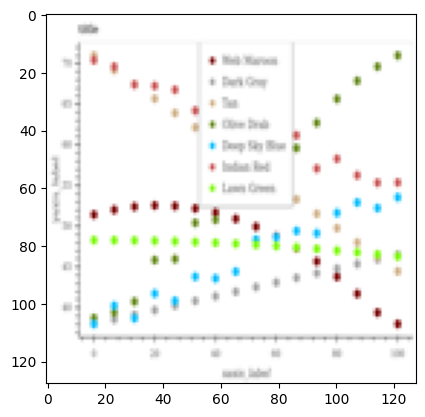

1/1 [==============================] - 0s 28ms/step
dot_line


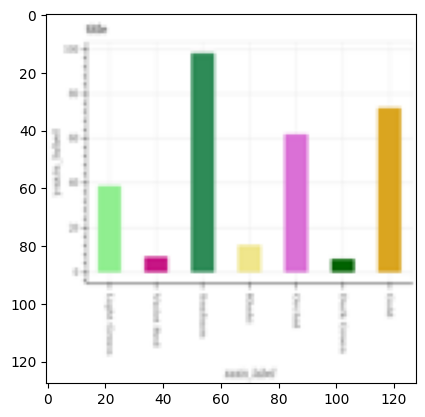

1/1 [==============================] - 0s 28ms/step
vbar_categorical


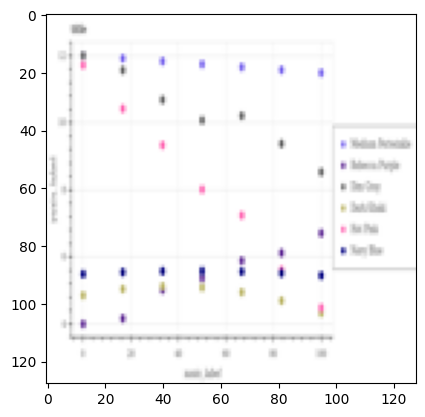

1/1 [==============================] - 0s 31ms/step
dot_line


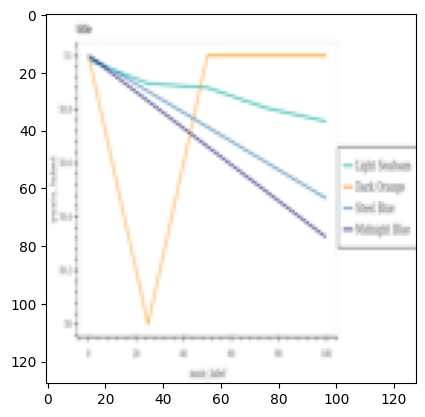

1/1 [==============================] - 0s 34ms/step
line


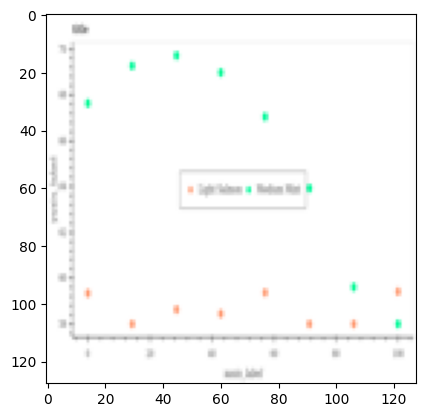

1/1 [==============================] - 0s 27ms/step
dot_line


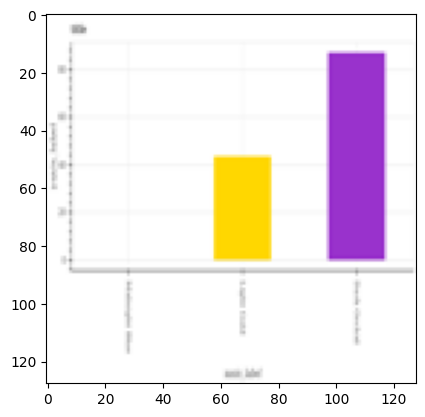

1/1 [==============================] - 0s 28ms/step
vbar_categorical


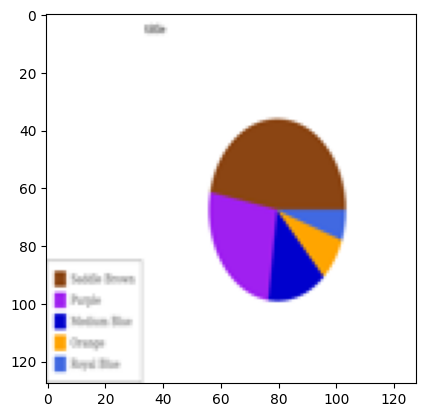

1/1 [==============================] - 0s 26ms/step
pie


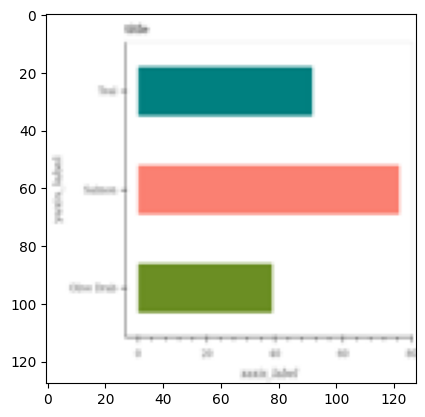

1/1 [==============================] - 0s 32ms/step
hbar_categorical


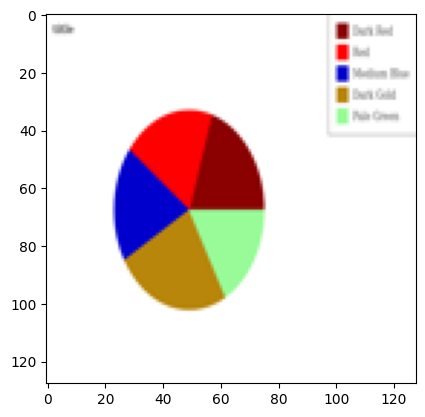

1/1 [==============================] - 0s 47ms/step
pie


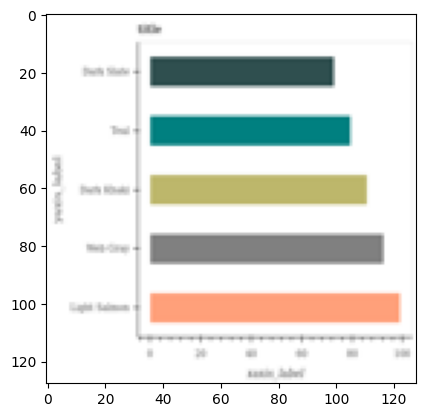

1/1 [==============================] - 0s 28ms/step
hbar_categorical


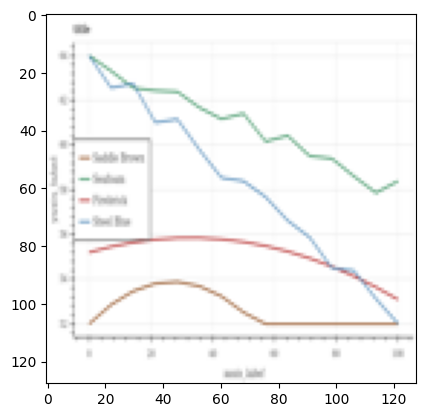

1/1 [==============================] - 0s 28ms/step
line


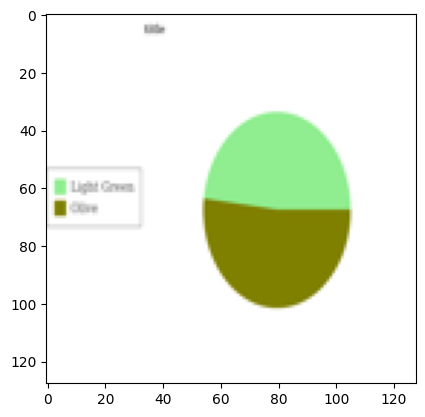

1/1 [==============================] - 0s 33ms/step
pie


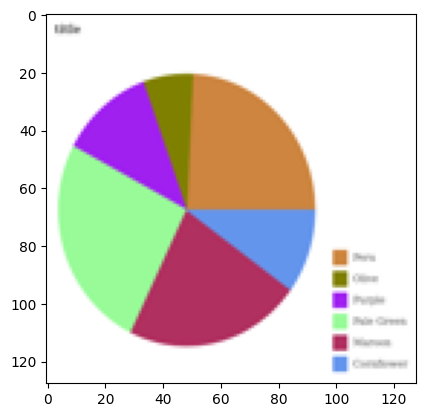

1/1 [==============================] - 0s 35ms/step
pie


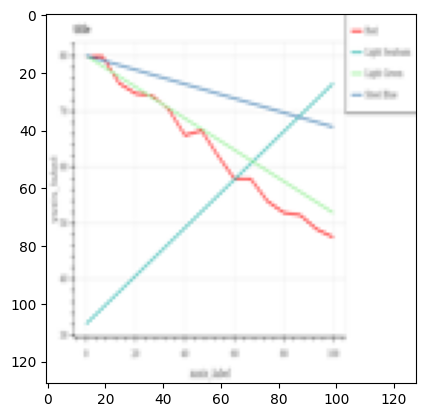

1/1 [==============================] - 0s 20ms/step
line


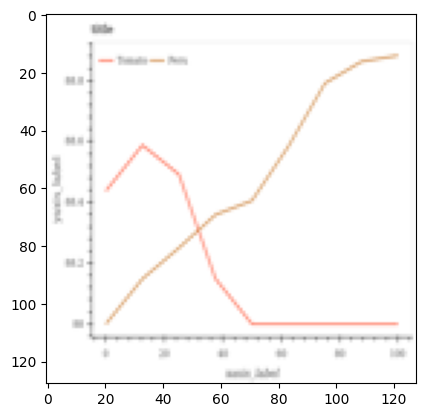

1/1 [==============================] - 0s 22ms/step
line


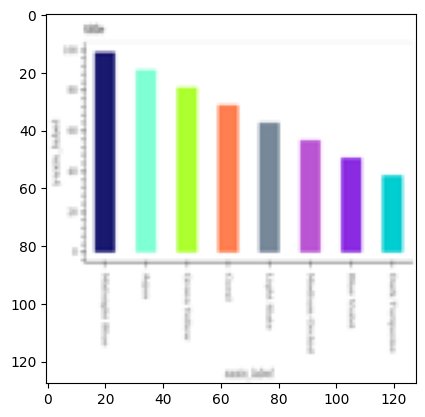

1/1 [==============================] - 0s 26ms/step
vbar_categorical


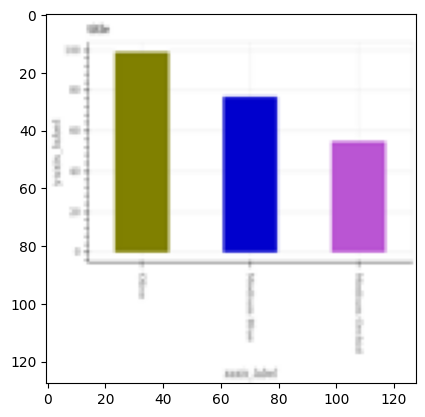

1/1 [==============================] - 0s 27ms/step
vbar_categorical


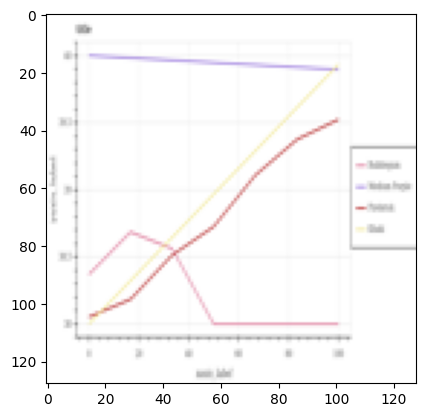

1/1 [==============================] - 0s 19ms/step
line


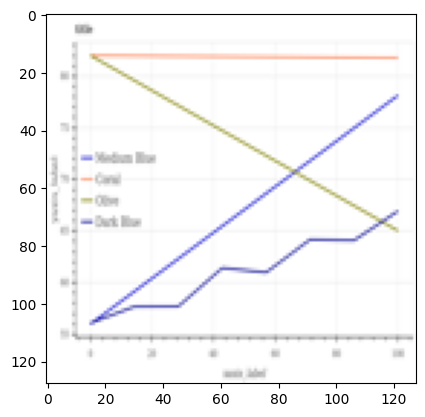

1/1 [==============================] - 0s 24ms/step
line


In [18]:
for i in X_test:
  img = Image.open(i)
  plt.imshow(img)
  plt.show()
  print(get_prediction(X_test[i]))

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
num_classes = 5
# Add a new fully connected layer with 4096 nodes and ReLU activation function
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Add another fully connected layer with 4096 nodes and ReLU activation function
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Add a final fully connected layer with num_classes output nodes and softmax activation function
predictions = Dense(num_classes, activation='softmax')(x)

# Define the new model with the original VGG16 layers and the new fully connected layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the weights of the original VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the appropriate optimizer and loss function
sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 3s 0us/step


NameError: ignored